In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import DBSCAN

In [167]:
df_dados = pd.read_csv("DBScan.csv")

df_dados

,x,y
0,0.349572,0.812367
1,0.335572,0.817302
2,0.308582,0.790850
3,0.317302,0.774825
4,0.314296,0.770972
...,...,...
548,0.457968,0.528903
549,0.458923,0.526447
550,0.451420,0.527094
551,0.450440,0.530037


In [181]:
def getModel():
    return DBSCAN(eps=0.025,min_samples=5)

In [182]:
model = getModel().fit(df_dados.values)

In [183]:
df_dados_rotulados = df_dados.copy()

df_dados_rotulados['rotulo'] = model.labels_


df_dados_rotulados["rotulo"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

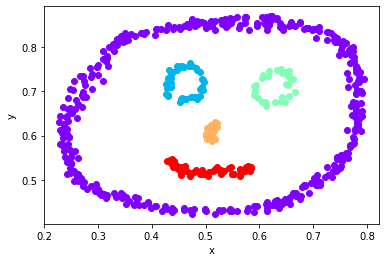

In [184]:
colors = cm.rainbow(np.linspace(0, 1, len(df_dados_rotulados['rotulo'].unique())))

for i in df_dados_rotulados["rotulo"].unique():
    df_pintar = df_dados_rotulados[df_dados_rotulados["rotulo"]==i]
    if i == -1:
       plt.scatter(df_pintar["x"].array,df_pintar["y"].array,color = "gray")
    else:
       plt.scatter(df_pintar["x"].array,df_pintar["y"].array,color = colors[i])

plt.xlabel("x")
plt.ylabel("y")

plt.show()

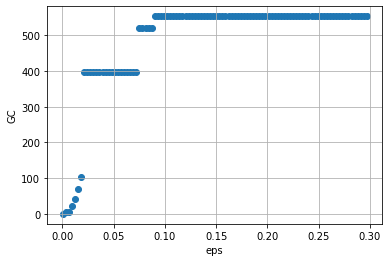

In [172]:
eps = 0.0001
min_samples = 5

incremento = 0.003

array_eps = []
array_mc = []

while eps < 0.3:
    dbscan = DBSCAN(eps=eps,min_samples=min_samples).fit(df_dados.values)

    df_rotulado = df_dados.copy()
    df_rotulado['rotulo'] = dbscan.labels_


    clusters = df_rotulado['rotulo'].unique()
    clusters = np.delete(clusters,np.where(clusters==-1))

    maiorCluster = 0

    for k in clusters:

        tamanho_cluster = len(df_rotulado[df_rotulado['rotulo']==k])

        if maiorCluster < tamanho_cluster:
            maiorCluster = tamanho_cluster

    array_eps.append(eps)
    array_mc.append(maiorCluster)

    eps+=incremento

plt.xlabel('eps')
plt.ylabel('GC')
plt.scatter(array_eps,array_mc)
plt.grid(True)
plt.show()